In [10]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#importing the data
data=pd.read_csv("C://Users//DELL//Downloads//titanicsurvival - titanicsurvival.csv")
data.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [12]:
#Dimension of the data
data.shape

(891, 5)

In [13]:
#Column names of the data
data.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Survived'], dtype='object')

In [14]:
# checking for missing values
data.isnull().values.any()

True

In [15]:
#mapping - bin values
data['Sex']=data['Sex'].replace({'male':0 , 'female':1})
data

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
888,3,1,NaN,23.4500,0
889,1,0,26.0,30.0000,1


In [16]:
#filling null values as mean
data.fillna(data.mean(),inplace=True)
data.isnull().values.any()

False

In [17]:
# List of continuous variables
continuous_variables = ['Pclass', 'Age', 'Fare']

# Selecting only the continuous variables from the DataFrame
continuous_data = data[continuous_variables]

#statistics for numerical features
continuous_data.describe()

,Pclass,Age,Fare
count,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208
std,0.836071,13.002015,49.693429
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,7.910400
50%,3.000000,29.699118,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


In [18]:
#pair-wise correlation of all numerical values
continuous_data.corr(method='pearson')

,Pclass,Age,Fare
Pclass,1.000000,-0.331339,-0.549500
Age,-0.331339,1.000000,0.091566
Fare,-0.549500,0.091566,1.000000


In [25]:
# Frequency of 'Survived'
survived_freq = data['Survived'].value_counts()
print("Survived Frequency:\n", survived_freq)

# Frequency of 'Pclass'
pclass_freq = data['Pclass'].value_counts()
print("\nPclass Frequency:\n", pclass_freq)

# Frequency of 'Sex'
sex_freq = data['Sex'].value_counts()
print("\nSex Frequency:\n", sex_freq)

Survived Frequency:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass Frequency:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex Frequency:
 Sex
0    577
1    314
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

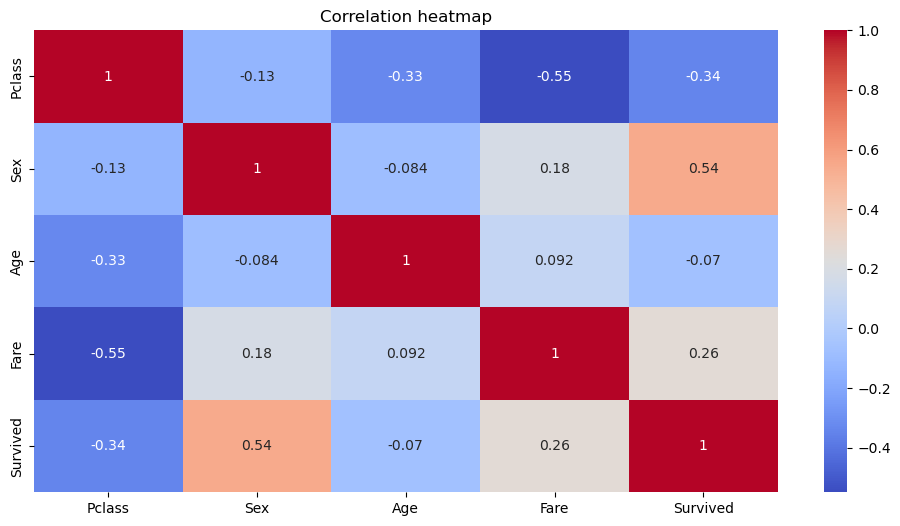

In [26]:
#CORRELATION HEATMAP:
correlation_matrix=data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show

In [20]:
#Survived vs sex
# Creating a crosstab table
crosstab = pd.crosstab(data['Survived'], data['Sex'])
print(crosstab)


Sex         0    1
Survived          
0         468   81
1         109  233


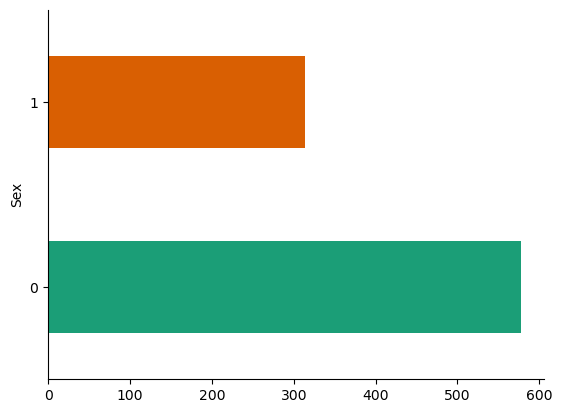

In [21]:
#Barplot of Sex
data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

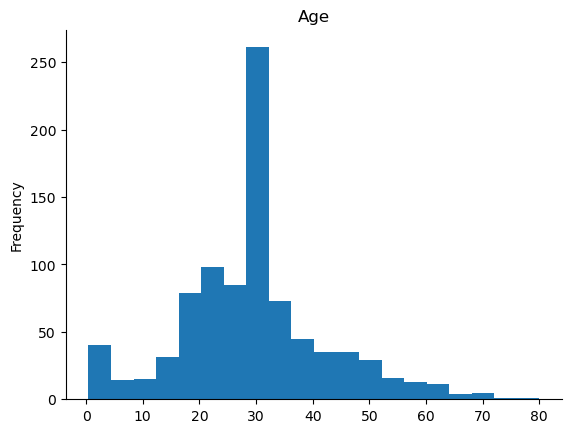

In [22]:
#Histogram of Age
from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

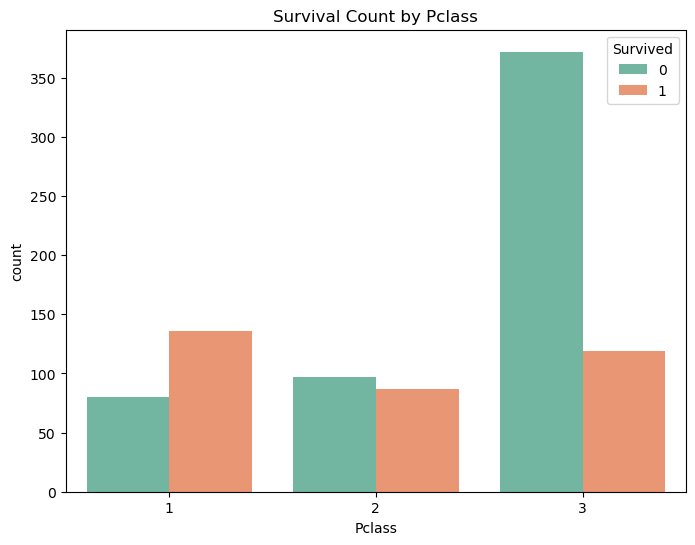

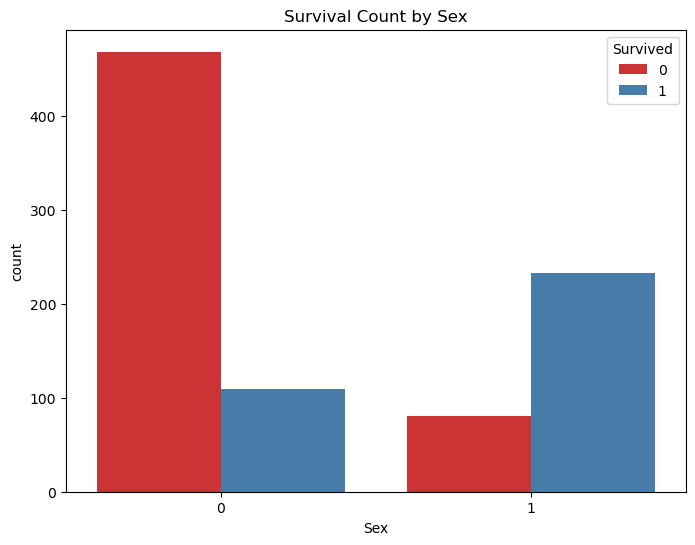

In [23]:
# Survival rate by 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set2')
plt.title('Survival Count by Pclass')
plt.show()


# Survival rate by 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived',palette='Set1')
plt.title('Survival Count by Sex')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

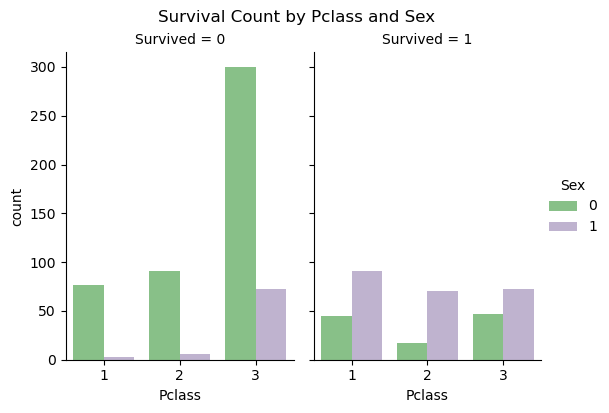

In [24]:
# Survival rate by 'Pclass' and 'Sex'
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x='Pclass', hue='Sex', col='Survived', kind='count', height=4, aspect=0.7,palette='Accent')
plt.suptitle('Survival Count by Pclass and Sex', y=1.02)
plt.show()